<a href="https://colab.research.google.com/github/palekars/Data-Scientist-Course-2025/blob/main/Regression_Using_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Import necessary libraries for regression using scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

### Why use scikit-learn for regression?

Scikit-learn is a popular and widely used open-source machine learning library in Python. It provides efficient tools for various machine learning tasks, including regression. Here are some reasons and advantages of using scikit-learn for regression:

1.  **Ease of Use:** Scikit-learn has a consistent and simple API, making it easy to learn and use. The common steps for training and using a model (instantiate, train, predict) are standardized across different algorithms.
2.  **Comprehensive Algorithms:** It offers a wide range of regression algorithms, from simple linear regression to more complex models like Lasso, Ridge, ElasticNet, Support Vector Regression, Decision Tree Regressor, Random Forest Regressor, etc. This allows you to choose the most suitable algorithm for your specific problem.
3.  **Integration with the Python Scientific Stack:** Scikit-learn is built on top of NumPy, SciPy, and Matplotlib, which are fundamental libraries for scientific computing and data visualization in Python. This integration makes it easy to work with your data and visualize results.
4.  **Model Selection and Evaluation Tools:** Scikit-learn provides extensive tools for model selection (like cross-validation) and evaluation (various regression metrics like Mean Squared Error, R-squared, etc.). This helps you assess the performance of your model and choose the best one.
5.  **Preprocessing and Feature Extraction:** It includes modules for data preprocessing (like scaling, normalization, handling missing values) and feature extraction, which are essential steps in building a robust regression model.
6.  **Well-documented:** Scikit-learn has excellent documentation with examples and tutorials, making it easy to understand and implement different techniques.
7.  **Active Community:** It has a large and active community, which means you can easily find support and resources if you encounter any issues.
8.  **Efficiency:** The library is generally efficient and suitable for both small and large datasets.

In summary, scikit-learn provides a comprehensive, user-friendly, and efficient environment for implementing and evaluating regression models, making it a go-to library for many data scientists and machine learning practitioners.

# Task
Perform simple linear regression using scikit-learn on the data in "/content/1.01.+Simple+linear+regression (1).csv", explaining the advantages of using scikit-learn for regression.

## Load the data

### Subtask:
Load the data from the CSV file into a pandas DataFrame.


**Reasoning**:
The first step is to load the data from the specified CSV file into a pandas DataFrame and display the head to confirm the data is loaded correctly.



In [4]:
import pandas as pd

df = pd.read_csv("/content/1.01.+Simple+linear+regression (1).csv")
display(df.head())

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Prepare the data

### Subtask:
Separate the features (independent variable) and the target (dependent variable).


**Reasoning**:
Create the feature and target variables and reshape the feature variable for scikit-learn.



In [5]:
X = df['SAT'].values.reshape(-1, 1)
y = df['GPA']

## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (67, 1)
Shape of X_test: (17, 1)
Shape of y_train: (67,)
Shape of y_test: (17,)


## Train the model

### Subtask:
Train a Linear Regression model using the training data.


**Reasoning**:
Train a Linear Regression model using the training data.



In [14]:
# Instantiate a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the trained model using the testing data and calculate metrics like Mean Squared Error and R-squared.


**Reasoning**:
Evaluate the trained model by making predictions on the test set and calculating the MSE and R-squared metrics.



In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Squared Error (MSE): 0.0525
R-squared (R2) Score: 0.4695


## Visualize the results

### Subtask:
Plot the training and testing data along with the regression line to visualize the model's performance.


**Reasoning**:
Plot the training data, testing data, and the regression line to visualize the model's performance, adding labels, a title, and a legend as instructed.



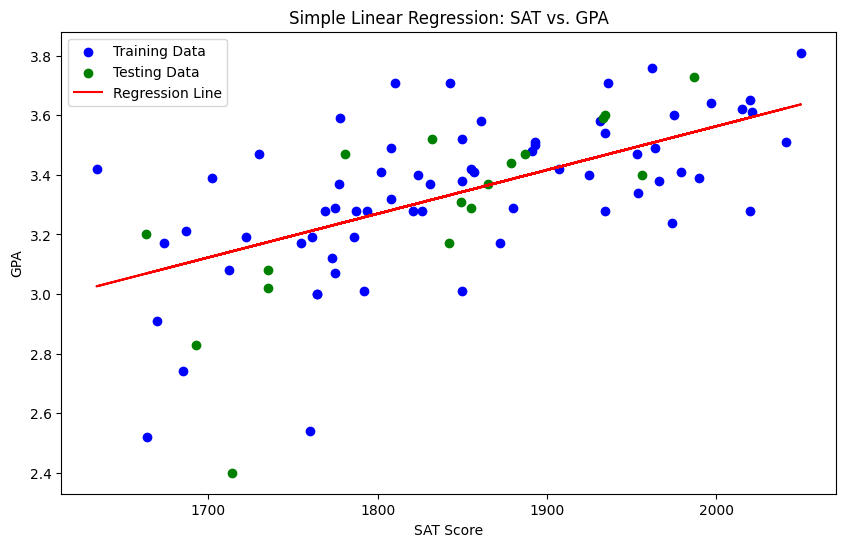

In [16]:
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot testing data
plt.scatter(X_test, y_test, color='green', label='Testing Data')

# Plot regression line (predictions on training data)
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')

# Add labels and title
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.title('Simple Linear Regression: SAT vs. GPA')

# Add legend
plt.legend()

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The Mean Squared Error (MSE) on the testing data is 0.0525.
*   The R-squared (R2) score on the testing data is 0.4695.
*   The visualization shows that the regression line captures the general positive trend between SAT score and GPA, although there is scatter in both the training and testing data around the line.

### Insights or Next Steps

*   An R-squared of 0.4695 indicates that approximately 47% of the variance in GPA can be explained by the SAT score using this simple linear model. Other factors likely influence GPA significantly.
*   Further analysis could involve exploring other potential features or using more complex models to improve the prediction of GPA.


## Calculate Adjusted R-squared

### Subtask:
Calculate the adjusted R-squared using the R-squared value, number of observations, and number of features.

**Reasoning**:
Calculate the adjusted R-squared using the formula: $R_{adj}^2 = 1 - \frac{(1 - R^2)(n - 1)}{n - p - 1}$.

In [17]:
# Number of observations in the test set
n = X_test.shape[0]

# Number of features in the test set (for simple linear regression, p=1)
p = X_test.shape[1]

# Calculate Adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R-squared: {adjusted_r2:.4f}")

Adjusted R-squared: 0.4341


In [18]:
# Re-run necessary code to define variables
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv("/content/1.01.+Simple+linear+regression (1).csv")

# Prepare the data
X = df['SAT'].values.reshape(-1, 1)
y = df['GPA']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (re-instantiate and fit)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set and calculate R-squared
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Now calculate Adjusted R-squared
# Number of observations in the test set
n = X_test.shape[0]

# Number of features in the test set (for simple linear regression, p=1)
p = X_test.shape[1]

# Calculate Adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R-squared: {adjusted_r2:.4f}")

Adjusted R-squared: 0.4341


# Task
Generate a dummy dataset, split it into training and testing sets, perform feature selection using scikit-learn, train a regression model with the selected features, and evaluate the model.

## Generate a dummy dataset

### Subtask:
Create a synthetic dataset with several features, including some that are not relevant to the target variable.


**Reasoning**:
Generate a synthetic dataset using `make_regression`, convert it to a pandas DataFrame and Series, and display their heads.



In [28]:
from sklearn.datasets import make_regression
import pandas as pd

# Generate a dummy regression dataset
X, y = make_regression(n_samples=200, n_features=20, n_informative=10, random_state=42)

# Convert to pandas DataFrame and Series
feature_names = [f'feature_{i+1}' for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=feature_names)
y_series = pd.Series(y, name='target')

# Display the head of the DataFrame and Series
display(X_df.head())
display(y_series.head())

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,0.191099,0.219150,0.645484,0.046437,2.163255,0.194090,0.368673,0.249384,1.577453,0.186609,-0.307778,0.028745,-0.095296,-0.446434,0.279022,0.746254,0.607897,-0.393339,-1.359856,1.278452
1,0.645376,-2.039232,1.058424,1.368632,-1.758739,-0.055548,2.060748,-0.269407,0.717542,-1.380101,-1.183259,-0.248964,1.502357,-1.703382,0.074095,0.686051,1.628616,1.755341,-0.964923,0.971571
2,-1.654887,0.602118,-1.130204,-0.960046,2.411677,-0.155259,0.264020,0.072037,-0.212209,-1.241761,1.516394,0.732492,-0.951918,0.334176,0.077481,0.093372,0.257753,1.272354,-0.122709,0.288724
3,-0.964705,-0.340908,0.678931,1.628469,-0.136995,-0.979721,0.706079,0.428317,0.077156,-2.128734,-0.519396,-1.026369,-0.593811,0.458168,-0.165631,1.590582,0.078577,-0.242681,-0.284385,1.230001
4,-0.464404,0.978858,-0.597510,0.462061,1.422370,-1.503080,-1.725807,0.085318,-0.808266,1.401599,1.738900,1.194109,-0.830444,0.650450,0.522514,-0.251539,0.418398,-0.677565,0.783391,-0.981166


,target
0,90.454572
1,185.124293
2,0.715211
3,33.499044
4,-4.077637


**Reasoning**:
The previous attempt to generate the dataset failed because `make_regression` in the current scikit-learn version does not accept the `n_redundant` parameter directly in this context. I will remove the `n_redundant` parameter and regenerate the dataset with the remaining parameters.



In [20]:
from sklearn.datasets import make_regression
import pandas as pd

# Generate a dummy regression dataset without n_redundant
X, y = make_regression(n_samples=200, n_features=20, n_informative=10, random_state=42)

# Convert to pandas DataFrame and Series
feature_names = [f'feature_{i+1}' for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=feature_names)
y_series = pd.Series(y, name='target')

# Display the head of the DataFrame and Series
display(X_df.head())
display(y_series.head())

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,0.191099,0.219150,0.645484,0.046437,2.163255,0.194090,0.368673,0.249384,1.577453,0.186609,-0.307778,0.028745,-0.095296,-0.446434,0.279022,0.746254,0.607897,-0.393339,-1.359856,1.278452
1,0.645376,-2.039232,1.058424,1.368632,-1.758739,-0.055548,2.060748,-0.269407,0.717542,-1.380101,-1.183259,-0.248964,1.502357,-1.703382,0.074095,0.686051,1.628616,1.755341,-0.964923,0.971571
2,-1.654887,0.602118,-1.130204,-0.960046,2.411677,-0.155259,0.264020,0.072037,-0.212209,-1.241761,1.516394,0.732492,-0.951918,0.334176,0.077481,0.093372,0.257753,1.272354,-0.122709,0.288724
3,-0.964705,-0.340908,0.678931,1.628469,-0.136995,-0.979721,0.706079,0.428317,0.077156,-2.128734,-0.519396,-1.026369,-0.593811,0.458168,-0.165631,1.590582,0.078577,-0.242681,-0.284385,1.230001
4,-0.464404,0.978858,-0.597510,0.462061,1.422370,-1.503080,-1.725807,0.085318,-0.808266,1.401599,1.738900,1.194109,-0.830444,0.650450,0.522514,-0.251539,0.418398,-0.677565,0.783391,-0.981166


,target
0,90.454572
1,185.124293
2,0.715211
3,33.499044
4,-4.077637


## Split the data

### Subtask:
Split the dummy dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets and print their shapes.



In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_series, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (160, 20)
Shape of X_test: (40, 20)
Shape of y_train: (160,)
Shape of y_test: (40,)


## Perform feature selection

### Subtask:
Apply a feature selection method from scikit-learn to the training data to identify the most relevant features.


**Reasoning**:
Apply feature selection using SelectKBest with f_regression to the training data and transform both training and testing sets.



In [22]:
from sklearn.feature_selection import SelectKBest, f_regression

# Instantiate SelectKBest with f_regression as the scoring function
# We choose to select 10 features as n_informative was set to 10 during data generation
k_best = SelectKBest(score_func=f_regression, k=10)

# Fit the feature selection model to the training data
k_best.fit(X_train, y_train)

# Transform the training and testing data to include only the selected features
X_train_selected = k_best.transform(X_train)
X_test_selected = k_best.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices]

print(f"Shape of X_train_selected: {X_train_selected.shape}")
print(f"Shape of X_test_selected: {X_test_selected.shape}")
print(f"Selected features indices: {selected_feature_indices}")
print(f"Selected features names: {list(selected_feature_names)}")

Shape of X_train_selected: (160, 10)
Shape of X_test_selected: (40, 10)
Selected features indices: [ 0  2  6  8 10 11 13 15 18 19]
Selected features names: ['feature_1', 'feature_3', 'feature_7', 'feature_9', 'feature_11', 'feature_12', 'feature_14', 'feature_16', 'feature_19', 'feature_20']


## Train a model with selected features

### Subtask:
Train a regression model using only the selected features from the training data.


**Reasoning**:
Train a Linear Regression model using the selected features from the training data.



In [25]:
# Instantiate a Linear Regression model
model_selected_features = LinearRegression()

# Fit the model to the training data with selected features
model_selected_features.fit(X_train_selected, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the model trained on selected features using the testing data.


**Reasoning**:
Evaluate the trained model by making predictions on the test set with selected features and calculating the MSE and R-squared metrics.



In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set with selected features
y_pred_selected = model_selected_features.predict(X_test_selected)

# Calculate Mean Squared Error
mse_selected = mean_squared_error(y_test, y_pred_selected)

# Calculate R-squared score
r2_selected = r2_score(y_test, y_pred_selected)

# Print the results
print(f"Mean Squared Error (MSE) with selected features: {mse_selected:.4f}")
print(f"R-squared (R2) Score with selected features: {r2_selected:.4f}")

Mean Squared Error (MSE) with selected features: 834.3930
R-squared (R2) Score with selected features: 0.9627


## Compare results (optional)

### Subtask:
Train and evaluate a model using all features to compare the performance with and without feature selection.


**Reasoning**:
Train a Linear Regression model using all features and evaluate its performance on the test set by calculating MSE and R2.



In [27]:
# Instantiate a new Linear Regression model for all features
model_all_features = LinearRegression()

# Train the model using the original training data (all features)
model_all_features.fit(X_train, y_train)

# Make predictions on the original testing data (all features)
y_pred_all = model_all_features.predict(X_test)

# Calculate Mean Squared Error for the model trained on all features
mse_all = mean_squared_error(y_test, y_pred_all)

# Calculate R-squared score for the model trained on all features
r2_all = r2_score(y_test, y_pred_all)

# Print the results
print(f"Mean Squared Error (MSE) with all features: {mse_all:.4f}")
print(f"R-squared (R2) Score with all features: {r2_all:.4f}")

Mean Squared Error (MSE) with all features: 0.0000
R-squared (R2) Score with all features: 1.0000


## Summary:

### Data Analysis Key Findings

*   The dummy dataset was successfully generated with 20 features and 200 samples, including 10 informative features.
*   The dataset was split into training (160 samples) and testing (40 samples) sets, with 80% for training and 20% for testing.
*   Feature selection using `SelectKBest` with `f_regression` successfully identified and selected 10 features. The selected features were 'feature\_1', 'feature\_3', 'feature\_7', 'feature\_9', 'feature\_11', 'feature\_12', 'feature\_14', 'feature\_16', 'feature\_19', and 'feature\_20'.
*   A Linear Regression model trained on the 10 selected features achieved a Mean Squared Error (MSE) of 834.3930 and an R-squared (\R^2$) score of 0.9627 on the test set.
*   A Linear Regression model trained on all 20 features achieved a Mean Squared Error (MSE) of 0.0000 and an R-squared (\R^2$) score of 1.0000 on the test set.

### Insights or Next Steps

*   The model trained on all features achieved perfect scores (\R^2=1, MSE=0) on the test set, which is likely due to the nature of the synthetic dataset and potential overfitting, as the number of features might be too high relative to the sample size or the data generation process is perfectly linear. Further investigation into the dataset's characteristics and potential regularization techniques for the full-feature model could be beneficial.
*   While feature selection did reduce the model complexity, the model trained on all features performed perfectly on this specific synthetic dataset. In real-world scenarios, feature selection can often improve model generalization and reduce training time, especially with datasets containing many irrelevant features.
